In [1]:
import sys
import os
sys.path.insert(0, "../../python")

from beam.beams import laserpulse
from beam.elements import plasma
from beam import interactions
import numpy as np

path = '/media/robert/Data_Storage/Data/Tests/Beam_Pulse/'

In [2]:
pulseParams = {'Nx' : 2**8,
               'Ny' : 2**6,
               'Nt' : 2**6,
               'X' : 2000,
               'Y' : 2000,
               'T' : 100,
               'lam' : 0.8,
               'path' : path,
               'name' : 'testPulse',
               'threads' : 4,
               'cyl' : True,
               'E0' : 100,
               'waist' : 100,
               'z0' : -0.25e6,
               'tau' : 35}

pulse = laserpulse.GaussianPulse(pulseParams)

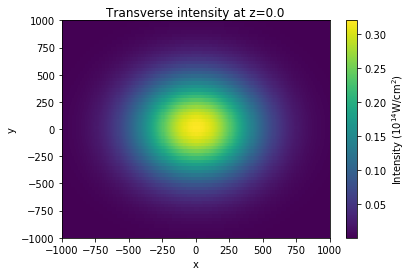

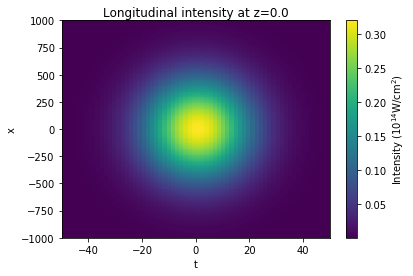

In [3]:
pulse.plot_current_tran_intensity()
pulse.plot_current_long_intensity()

In [4]:
plasmaParams = {'Nx' : pulseParams['Nx'],
                'Ny' : pulseParams['Ny'],
                'Nz' : 2,
                'X' : pulseParams['X'],
                'Y' : pulseParams['Y'],
                'Z' : 0.1,
                'n0': 0.1,
                'atom' : {'EI' : 15.7596,
                          'Z' : 1,
                          'l' : 1,
                          'm' : 0,
                          'alpha' : 1.664},
                'path' : path,
                'name' : 'testPlasma',
                'cyl' : True}

argon = plasma.UniformPlasma(plasmaParams)

In [5]:
#interactions.pulse_uniform_gas(pulse, argon)

In [6]:
import cProfile
%load_ext line_profiler
from line_profiler import LineProfiler
%load_ext memory_profiler
#import timeit

import beam.calc.plasma as pcalc

def do_profile(follow=[]):
    def inner(func):
        def profiled_func(*args, **kwargs):
            try:
                profiler = LineProfiler()
                profiler.add_function(func)
                for f in follow:
                    profiler.add_function(f)
                profiler.enable_by_count()
                return func(*args, **kwargs)
            finally:
                profiler.print_stats()
        return profiled_func
    return inner

@do_profile(follow=[pcalc.plasma_refraction])
def test(pulse, argon):
    interactions.pulse_uniform_gas(pulse, argon)
    
result = test(pulse, argon)

Timer unit: 1e-06 s

Total time: 0.108685 s
File: <ipython-input-6-9accda98dd53>
Function: test at line 24

Line #      Hits         Time  Per Hit   % Time  Line Contents
    24                                           @do_profile(follow=[pcalc.plasma_refraction])
    25                                           def test(pulse, argon):
    26         1       108685 108685.0    100.0      interactions.pulse_uniform_gas(pulse, argon)

Total time: 0.108504 s

Could not find file beam/calc/plasma.pyx
Are you sure you are running this program from the same directory
that you ran the profiler from?
Continuing without the function's contents.

Line #      Hits         Time  Per Hit   % Time  Line Contents
    31                                           
    32                                           
    33                                           
    34                                           
    35                                           
    36                                   

In [7]:
# Lets compare this code to the old code
plasmaParams = {'Nx' : pulseParams['Nx'],
                'Ny' : pulseParams['Ny'],
                'Nz' : 100,
                'X' : pulseParams['X'],
                'Y' : pulseParams['Y'],
                'Z' : 0.1,
                'n0': 0.1,
                'atom' : {'EI' : 15.7596,
                          'Z' : 1,
                          'l' : 1,
                          'm' : 0,
                          'alpha' : 1.664},
                'path' : path,
                'name' : 'testPlasma',
                'cyl' : True}

argon = plasma.UniformPlasma(plasmaParams)

def Efunc(x, y, params):
    # Input Gaussian beam
    w0 = 1e2
    r2 = x**2 + y**2
    E0 = np.exp(-r2 / w0**2)
    # Spherical lens
    f = 0.25e6
    T0 = np.exp(-1j*np.pi*r2/(0.8*f))
    # Initial electric field
    return E0 * T0

# Temporal pulse
def Tfunc(t):
    from ionization import ionization
    tau = pulseParams['tau']
    return ionization.gaussian_envelope(0.325, t, tau).real

# Setup the parameters
params = {'Nx' : pulseParams['Nx'],
          'Ny' : pulseParams['Ny'],
          'Nz' : plasmaParams['Nz'],
          'Nt' : pulseParams['Nt'],
          'X' : pulseParams['X'],
          'Y' : pulseParams['Y'],
          'Z' : plasmaParams['Nz'],
          'T' : pulseParams['T'],
          'n0' : plasmaParams['n0'],
          'alpha' : plasmaParams['atom']['alpha'],
          'EI' : plasmaParams['atom']['EI'],
          'lam' : pulseParams['lam'],
          'path' : path,
          'E0' : 0.0
          }

# Create the summary
#plasma.summary_plot(params['path'])

In [8]:
import propagation.plasma as plasmaOld
#%timeit plasmaOld.plasma_refraction(params, Efunc, Tfunc)
#%timeit interactions.pulse_uniform_gas(pulse, argon)
#plasmaOld.summary_plot(params['path'])

In [9]:
params['Nz'] = 2
@do_profile(follow=[plasmaOld.plasma_refraction])
def test(params, Efunc, Tfunc):
    plasmaOld.plasma_refraction(params, Efunc, Tfunc)
    
result = test(params, Efunc, Tfunc)

Completed time slice  1  of  64
Completed time slice  2  of  64
Completed time slice  3  of  64
Completed time slice  4  of  64
Completed time slice  5  of  64
Completed time slice  6  of  64
Completed time slice  7  of  64
Completed time slice  8  of  64
Completed time slice  9  of  64
Completed time slice  10  of  64
Completed time slice  11  of  64
Completed time slice  12  of  64
Completed time slice  13  of  64
Completed time slice  14  of  64
Completed time slice  15  of  64
Completed time slice  16  of  64
Completed time slice  17  of  64
Completed time slice  18  of  64
Completed time slice  19  of  64
Completed time slice  20  of  64
Completed time slice  21  of  64
Completed time slice  22  of  64
Completed time slice  23  of  64
Completed time slice  24  of  64
Completed time slice  25  of  64
Completed time slice  26  of  64
Completed time slice  27  of  64
Completed time slice  28  of  64
Completed time slice  29  of  64
Completed time slice  30  of  64
Completed time slic